<a href="https://colab.research.google.com/github/danon6868/BI-stat-course/blob/main/lecture_4_stat_intro/lecture/lecture_4_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [How to use R in Colab?](https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497)

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%bash
ls

pwd

sample_data
/content


In [ ]:
%%R
x <- seq(0, 2*pi, length.out=50)
x

 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


In [ ]:
x = %R x
x

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

## Central limit theorem


We will visualize CLT using `Python`, and at home you will practice doing it in `R`.

In [ ]:
import numpy as np # library for working with vectors like with `c` in R
import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization (basic)

In [ ]:
# Some settings
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["font.size"] = 15

# Set seed for reproducibility
np.random.seed(101)

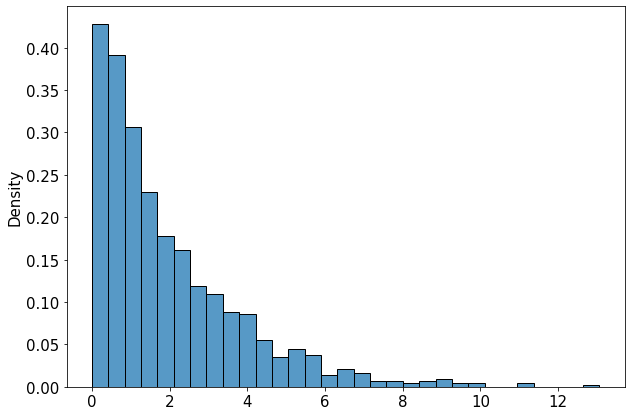

In [ ]:
sample_size = 1000
sample = np.random.chisquare(2, size=sample_size) # 2 is a mean

sns.histplot(sample, stat="density");

Extract 1000 samples, calculate the sample mean and append the result in `samples_mean`:

In [ ]:
num_of_samples = 100
samples_mean = []
for i in range(num_of_samples):
    sample = np.random.chisquare(2, size=sample_size)
    samples_mean.append(np.mean(sample))

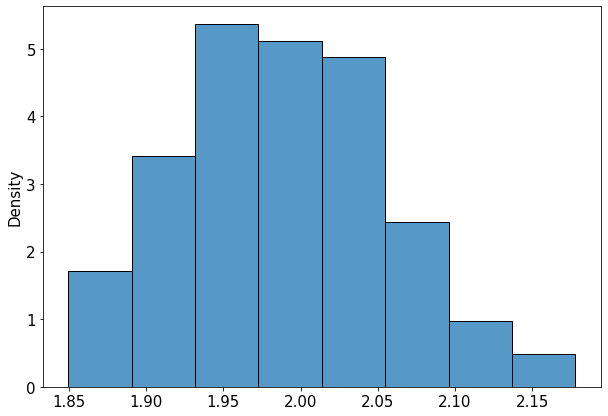

In [ ]:
sns.histplot(samples_mean, stat="density");

In [ ]:
np.mean(samples_mean)

1.9890415374375894

## Standard error of the mean


$se = \frac{\sigma}{\sqrt{n}}$

In [ ]:
np.std(samples_mean)

0.06819886543333863

In [ ]:
np.std(sample) / np.sqrt(sample_size)

0.06559626265107404

## Confidence interval

In [ ]:
# Generate population
population = np.random.normal(180, 20, size=100000)

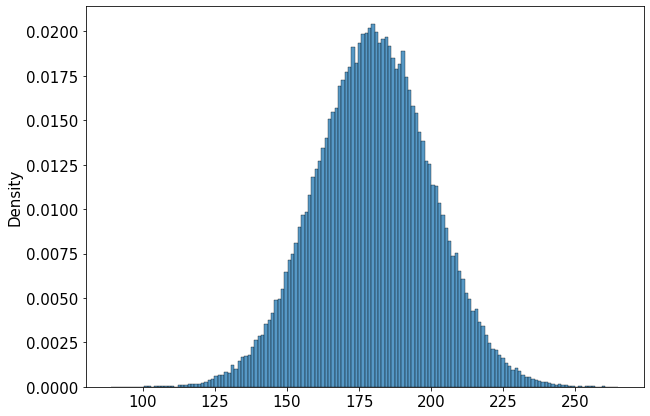

In [ ]:
sns.histplot(population, stat="density")

In [ ]:
mu = np.mean(population)
std = np.std(population)

In [ ]:
num_of_samples = 1000
samples_mean = []
for i in range(num_of_samples):
    sample = np.random.choice(population, size=sample_size)
    samples_mean.append(np.mean(sample))

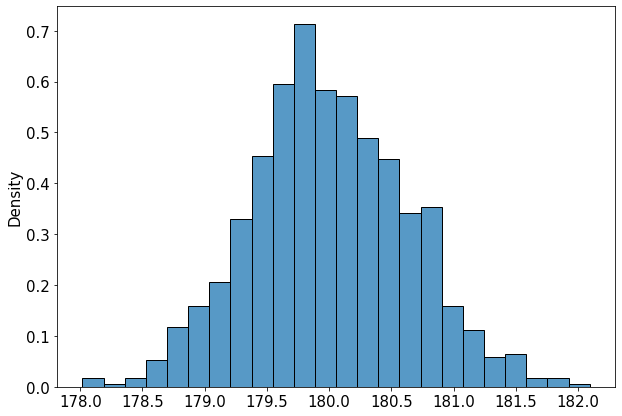

In [ ]:
sns.histplot(samples_mean, stat="density")

In [ ]:
se = std / np.sqrt(sample_size)
se

0.6326406788235067

In [ ]:
mean_mean = np.mean(samples_mean)
left_b = mean_mean - 1.96 * se
right_b = mean_mean + 1.96 * se

left_b, right_b

(178.75974713072904, 181.2396985917172)

In [ ]:
mu

180.01902684300234

We can check the effect of sample size on the CI:

## Calculate CI fairly

## What does it mean, 95% CI?

In [ ]:
def calculate_ci(sample, std=None):
    if std is None:
        std = sample.std()
    
    mean = sample.mean()
    se = std / np.sqrt(len(sample))
    left_b = mean - 1.96 * se
    right_b = mean + 1.96 * se

    return left_b, right_b

In [ ]:
# Known sigma
sample_size = 1000
outcomes = []

for i in range(1000):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample, std=std)

    outcomes.append((left_b < mu) & (mu < right_b))

print(np.mean(outcomes))

0.957


In [ ]:
# Unknown sigma
sample_size = 1000
outcomes = []

for i in range(1000):
    sample = np.random.choice(population, size=sample_size)
    left_b, right_b = calculate_ci(sample)

    outcomes.append((left_b < mu) & (mu < right_b))

print(np.mean(outcomes))

0.93
